Import the modules that will be used.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. If the vectors are on length n. 

\begin{align}
  \begin{bmatrix}
      a_{1} \\
      a_{2} \\
      \vdots \\
      a_{n}
    \end{bmatrix}
  \cdot
  \begin{bmatrix}
      b_{1} \\
      b_{2} \\
      \vdots \\
      b_{n}
    \end{bmatrix}
  =a_1b_1 + a_2b_2 + ... + a_nb_n
\end{align}

The cost of the operation $a_1b_1$ is $O(1)$. This is performed n times, so overall the complexity is $O(n)$.

2. Matrix-vector product

\begin{align}
  \begin{bmatrix} 
      a_{1} & \dots & a_{n} \\
      \vdots & \ddots & \\
      a_{n} &        & a_{nn} 
  \end{bmatrix}
  \begin{bmatrix}
      b_{1} \\
      b_{2} \\
      \vdots \\
      b_{n}
  \end{bmatrix}
  =
  \begin{bmatrix}
      a_1b_1 + a_2b_2 ... a_nb_n \\
      a_2b_1 + a_3b_2 ... a_{n1}b_n \\
      \vdots \\
      a_nb_1+a_{n1}b_2 ... a_{nn}b_n
  \end{bmatrix}  
\end{align}

The cost of the operation $a_1b_1$ is $O(1)$. For the first row, this is performed n times, so overall the cost for one row is $O(n)$. There are n columns, and each column has a compliexity of $O(n)$, so the overall complexity is $O(n^2)$.

3. Matrix-matrix product

\begin{align}
  \begin{bmatrix} 
      a_{1} & \dots & a_{n} \\
      \vdots & \ddots & \\
      a_{n} &        & a_{nn} 
  \end{bmatrix}
  \begin{bmatrix} 
      b_{1} & \dots & b_{n} \\
      \vdots & \ddots & \\
      b_{n} &        & b_{nn} 
  \end{bmatrix}
\end{align}

The cost of the operation $a_1b_1$ is $O(1)$. The element in the first row and first column of the result is given as $a_1b_1+a_2b_2+...+a_nb_n$. This element requires the operation $a_1b_2$ to be performed n times, so the cost of one element is $O(n)$. There are n elements in each row so the cost of one row is $O(n^2)$. There are n columns so the overall complexity is $O(n^3)$.

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

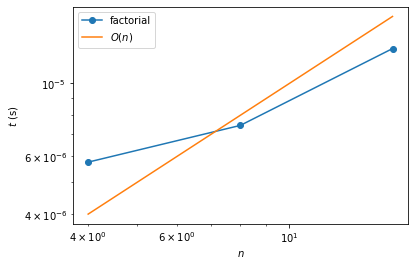

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create array of problem sizes n we want to test (powers of 2)
N = 2**np.arange(2, 5)

# Initialise an empty array to stores times for plotting
times = []

# Time the search for each problem size
for n in N:

    # Time search function
    t = %timeit -q -n4 -r1 -o factorial(n)

    # Store best case time
    times.append(t.best)

# Plot and label the time taken for factorial
plt.loglog(N, times, marker='o', label='factorial')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n)
plt.loglog(N, 1e-6*N, label='$O(n)$')

# Add legend
plt.legend(loc=0)

plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [ ]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [ ]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create array of problem sizes n we want to test (powers of 2)
N = 2**np.arange(2, 13)

def determinant(n):
  matrix = np.random.rand(n, n)
  return np.linalg.slogdet(matrix)

# Initialise an empty array to stores times for plotting
times = []

for n in N:

  # Time search function
  t = %timeit -q -n4 -r1 -o determinant(n)

  # Store best case time
  times.append(t.best)

Plot result:

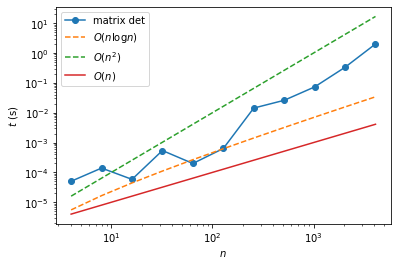

In [ ]:
# Plot and label the time taken for factorial
plt.loglog(N, times, marker='o', label='matrix det')

# Show reference lines of O(n*log(n)), O(n^2), O(n)
plt.loglog(N, 1e-6*N*np.log(N), '--', label=r'$O(n\log n)$')
plt.loglog(N, 1e-6*N**2, '--', label=r'$O(n^2$)')
plt.loglog(N, 1e-6*N, label='$O(n)$')

# Show legend
plt.legend(loc=0);

# Add label and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.show()